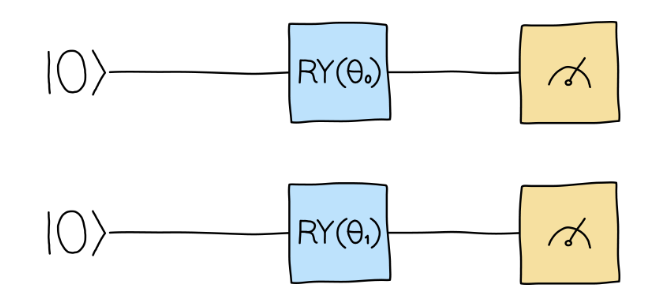

In [1]:
import json
import pennylane as qml
import pennylane.numpy as np

# Put your code here #
dev = qml.device('default.qubit', wires=2)
# Create a default.qubit device with 2 qubits / wires using qml.device

# Turn your circuit into a QNode
@qml.qnode(dev)

def circuit(angles):
    """
    The quantum circuit that you will simulate.

    Args:
        angles (list(float)): The gate angles in the circuit.

    Returns:
        (numpy.tensor): The probability vector of the underlying quantum state
        that this circuit produces.
    """


    # Put the rotation gates here
    qml.RY(angles[0], 0)
    qml.RY(angles[1], 1)

    return qml.probs(wires=[0, 1])


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    angles = json.loads(test_case_input)
    output = circuit(angles).tolist()

    return str(output)


def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(solution_output, expected_output, rtol=1e-4)


# These are the public test cases
test_cases = [
    ('[1.23, 4.56]', '[0.2829251572359589, 0.3841937063262924, 0.1411749135148633, 0.1917062229228854]'),
    ('[7.89, 0.12]', '[0.48026161094775754, 0.001733099740534947, 0.5161427069791757, 0.0018625823325319265]')
]

# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[1.23, 4.56]'...
Correct!
Running test case 1 with input '[7.89, 0.12]'...
Correct!
